In [50]:
!pip install matplotlib

     |████████████████████████████████| 7.2 MB 9.7 MB/s eta 0:00:01     |██████████▍                     | 2.3 MB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 899 kB 46.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 50.2 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 14.8 MB/s eta 0:00:01
You should consider upgrading via the '/Users/alexanderlerma/.pyenv/versions/3.9.5/bin/python3.9 -m pip install --upgrade pip' command.


In [61]:
import pandas as pd
import numpy as np
import yfinance as yf
from ta import add_all_ta_features
from ta.utils import dropna

In [62]:
ticker_str = 'TSLA'
ticker = yf.Ticker(ticker_str)

# get stock info
ticker.info

# get historical market data
hist = ticker.history(period="max")

In [63]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [64]:
# # Clean NaN values
dropna_df = dropna(hist[['Open', 'High', 'Low', 'Close', 'Volume']])
dropna_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,34334500


In [65]:
# Add ta features filling NaN values
ta_df = add_all_ta_features(dropna_df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=False)

/Users/alexanderlerma/.pyenv/versions/3.9.5/lib/python3.9/site-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/Users/alexanderlerma/.pyenv/versions/3.9.5/lib/python3.9/site-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
/Users/alexanderlerma/.pyenv/versions/3.9.5/lib/python3.9/site-packages/ta/trend.py:938: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_up = pd.Series(index=self._psar.index)
/Users/alexanderlerma/.pyenv/versions/3.9.5/lib/python3.9/site-packages/ta/trend.py:939: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self._psar_down = pd.Series(index=self._psar.index)


In [66]:
ta_df.tail()

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-01,1081.150024,1094.750000,1066.640015,1084.589966,18012900,3.895135e+09,5794589900,0.208163,4.200113e+08,-1434.924533,...,6.134266,3.923335,2.210931,-4.933249,-0.301357,-4.631892,1073.124780,0.648663,0.646568,22599.664996
2022-04-04,1089.380005,1149.910034,1072.530029,1145.449951,27345300,3.919328e+09,5821935200,0.302631,5.977575e+08,8637.778844,...,6.635418,4.465751,2.169667,-3.415307,-0.924147,-2.491160,1095.483547,5.611336,5.459553,23873.419431
2022-04-05,1136.300049,1152.869995,1087.300049,1091.260010,26691700,3.895860e+09,5795243500,0.243168,3.057319e+08,2177.744143,...,6.518090,4.876219,1.641871,-2.409669,-1.221252,-1.188417,1095.120489,-4.730887,-4.846453,22739.264078
2022-04-06,1073.469971,1079.000000,1027.699951,1045.760010,29782800,3.887047e+09,5765460700,0.187241,6.846772e+07,-11494.927066,...,5.999901,5.100956,0.898946,-0.623818,-1.101765,0.477947,1093.868736,-4.169492,-4.258910,21786.982764
2022-04-07,1052.390015,1076.589966,1021.539978,1057.260010,26391400,3.894905e+09,5791852100,0.189827,1.020439e+08,-893.811618,...,5.613188,5.203402,0.409786,-0.296056,-0.940623,0.644567,1093.005946,1.099679,1.093676,22027.669250


<AxesSubplot:xlabel='Date'>

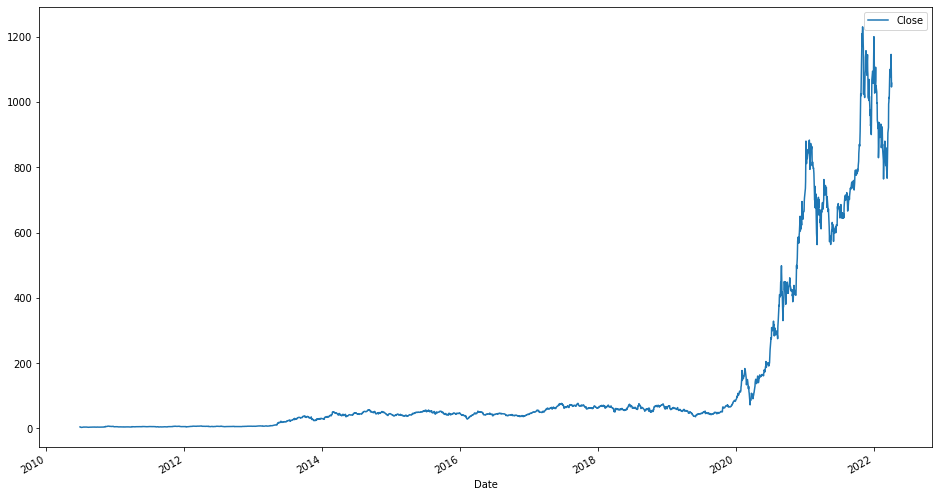

In [72]:
ta_df[['Close']].plot(figsize=(16,9))